# Setup

This project requires Python 3.7 or above:

In [3]:
import sys

assert sys.version_info >= (3, 7)

And Tensorflow >= 2.8:

In [4]:
from packaging import version
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

## Using TensorFlow like numpy

### Tensors and Operations

#### Tensors

In [7]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])  # matrix
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [8]:
t.shape

TensorShape([2, 3])

In [9]:
t.dtype

tf.float32

#### Indexing

In [10]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [11]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

#### Ops

In [12]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [13]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [14]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

#### Scalars

In [15]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

#### Keras's low-level API

You may still run across code that used Keras's low-level API:

In [16]:
K = tf.keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

But since Keras does not support multiple backends anymore, you should instead use TF's low-level API directly:

In [17]:
tf.square(tf.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

### Tensors and NumPY

In [18]:
import numpy as np

a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [19]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [20]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [21]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [22]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

### Type Conversions

In [23]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [24]:
try:
    tf.constant(2.0) + tf.constant(40, dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


In [25]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### Variables

In [26]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [27]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [28]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [29]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [30]:
v.scatter_nd_update(
    indices=[[0, 0], [1, 2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [31]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]],
                                indices=[1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

In [32]:
try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


#### Strings

In [33]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [34]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [35]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [36]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [37]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

### Other Data Structures

#### String arrays

In [38]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [39]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [40]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [41]:
b = tf.strings.unicode_encode(u, "UTF-8")
b

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [42]:
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [43]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [44]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [45]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2])>

In [46]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857]]>

#### Ragged tensors

In [47]:
r[1]

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([ 67, 111, 102, 102, 101, 101])>

In [48]:
r[1:3]

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>

In [49]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
tf.concat([r, r2], axis=0)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>

In [50]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71],
 [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [51]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]])>

#### Sparse tensor

In [52]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])

In [53]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [54]:
s * 42.0

In [55]:
try:
    s + 42.0
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [56]:
# shows how to multiply a sparse tensor and a dense tensor
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [57]:
# when creating a sparse tensor, values must be given in "reading order",
# or else `to_dense()` will fail.
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],  # WRONG ORDER!
                 values=[1., 2.],
                 dense_shape=[3, 4])
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

{{function_node __wrapped__SparseToDense_device_/job:localhost/replica:0/task:0/device:GPU:0}} indices[1] is out of order. Many sparse ops require sorted indices.
  Use `tf.sparse.reorder` to create a correctly ordered copy.


	 [[{{node SparseToDense}}]] [Op:SparseToDense]


In [58]:
# shows how to fix the sparse tensor s5 by reordering its values
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

#### Tensor Arrays

In [59]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))
tensor1 = array.read(1)  # returns (and zeros out!) tf.constant([3., 10.])

In [60]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [61]:
# shows how to disable clear_after_read
array2 = tf.TensorArray(dtype=tf.float32, size=3, clear_after_read=False)
array2 = array2.write(0, tf.constant([1., 2.]))
array2 = array2.write(1, tf.constant([3., 10.]))
array2 = array2.write(2, tf.constant([5., 7.]))
tensor2 = array2.read(1)
array2.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1.,  2.],
       [ 3., 10.],
       [ 5.,  7.]], dtype=float32)>

In [62]:
# shows how to create and use a tensor array with a dynamic size
array3 = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
array3 = array3.write(0, tf.constant([1., 2.]))
array3 = array3.write(1, tf.constant([3., 10.]))
array3 = array3.write(2, tf.constant([5., 7.]))
tensor3 = array3.read(1)
array3.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

#### Sets

In [63]:
a = tf.constant([[1, 5, 9]])
b = tf.constant([[5, 6, 9, 11]])
u = tf.sets.union(a, b)
u

In [64]:
tf.sparse.to_dense(u)

<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[ 1,  5,  6,  9, 11]])>

In [65]:
a = tf.constant([[1, 5, 9], [10, 0, 0]])
b = tf.constant([[5, 6, 9, 11], [13, 0, 0, 0]])
u = tf.sets.union(a, b)
tf.sparse.to_dense(u)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[ 1,  5,  6,  9, 11],
       [ 0, 10, 13,  0,  0]])>

In [66]:
# shows how to use a different default value: -1 in this case
a = tf.constant([[1, 5, 9], [10, -1, -1]])
b = tf.constant([[5, 6, 9, 11], [13, -1, -1, -1]])
u = tf.sets.union(a, b)
tf.sparse.to_dense(u, default_value=-1)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[ 1,  5,  6,  9, 11],
       [-1, 10, 13, -1, -1]])>

In [67]:
# shows how to use `tf.sets.difference()`
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]])>

In [68]:
# shows how to use `tf.sets.intersection()`
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]])>

In [69]:
# check whether set1[0] contains 5
tf.sets.size(tf.sets.intersection(set1[:1], tf.constant([[5, 0, 0, 0]]))) > 0

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([ True])>

#### Queues

In [70]:
q = tf.queue.FIFOQueue(3, [tf.int32, tf.string], shapes=[(), ()])
q.enqueue([10, b"windy"])
q.enqueue([15, b"sunny"])
q.size()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [71]:
q.dequeue()

[<tf.Tensor: shape=(), dtype=int32, numpy=10>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'windy'>]

In [72]:
q.enqueue_many([[13, 16], [b'cloudy', b'rainy']])

In [73]:
q.dequeue_many(3)

[<tf.Tensor: shape=(3,), dtype=int32, numpy=array([15, 13, 16])>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'sunny', b'cloudy', b'rainy'], dtype=object)>]

# Customizing Models and Training Algorithms

## Custom Loss Functions

In [74]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

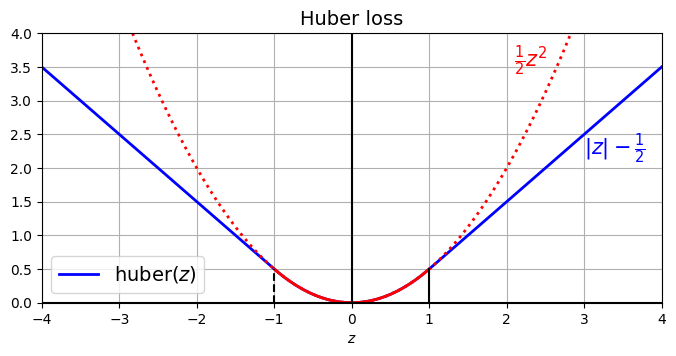

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
z_center = np.linspace(-1, 1, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z ** 2 / 2, "r:", linewidth=2)
plt.plot(z_center, z_center ** 2 /2, "r", linewidth=2)
plt.plot([-1, -1], [0, huber_fn(0., 1.)], "k--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "k-")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.text(2.1, 3.5, r"$\frac{1}{2}z^2$", color="r", fontsize=15)
plt.text(3.0, 2.2, r"$|z| - \frac{1}{2}$", color="b", fontsize=15)
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

To test our custom loss function, let's create a basic Keras model and train it on the California house dataset:

In [76]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

input_shape = X_train.shape[1:]

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

In [77]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [78]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 6ms/step - loss: 0.4827 - mae: 0.8318 - val_loss: 0.3478 - val_mae: 0.6525
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.2411 - mae: 0.5412 - val_loss: 0.2641 - val_mae: 0.5484


## Saving/Loading Models with Custom Objects

In [79]:
model.save("my_model_with_a_custom_loss")

INFO:tensorflow:Assets written to: my_model_with_a_custom_loss\assets


Saving a model containing a custom loss function works fine, but when you load it, you'll need to provide a dictionary that maps the function name to the actual function. More generally, when you load a model containing custom objects, you need to map the names to the objects:

In [80]:
model = tf.keras.models.load_model("my_model_with_a_custom_loss",
                                   custom_objects={"huber_fn": huber_fn})

In [81]:
model.fit(X_train_scaled, y_train, epochs=2, 
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
106/363 [=======>......................] - ETA: 1s - loss: 0.2195 - mae: 0.5130

363/363 [==============================] - 3s 6ms/step - loss: 0.2050 - mae: 0.4906 - val_loss: 0.2199 - val_mae: 0.4934
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.1885 - mae: 0.4677 - val_loss: 0.2025 - val_mae: 0.4776


In [82]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold ** 2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [83]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [84]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2


363/363 [==============================] - 2s 4ms/step - loss: 0.2049 - mae: 0.4594 - val_loss: 0.2229 - val_mae: 0.4561
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.1977 - mae: 0.4527 - val_loss: 0.2056 - val_mae: 0.4533


In [85]:
model.save("my_model_with_a_custom_loss_threshold_2")

INFO:tensorflow:Assets written to: my_model_with_a_custom_loss_threshold_2\assets


When you save the model, the threshold will not be saved. This means that you will have to specify the threshold value when loading the model (note that the name to use is `"huber_fn"`, which is the name of the function you gave Keras, not the name of the function that created it):

In [86]:
model = tf.keras.models.load_model("my_model_with_a_custom_loss_threshold_2",
                                   custom_objects={"huber_fn": create_huber(2.0)})

You can solve this by creating a subclass of the `tf.keras.losses.Loss` class, and then implementing its `get_config()` method:

In [87]:
class HuberLoss(tf.keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold ** 2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

Let's walk through this code:

- The constructor accepts `**kwargs` and passes them to the parent constructor, which handles standard hyperparameters: the name of the loss and the `reduction` algorithm to use to aggregate the individual instance losses. By default this is `"AUTO"`, which is equivalent to `"SUM_OVER_BATCH_SIZE"`: the loss will be the sum of the instances losses, weighted by the sample weights, if any, and divided by the batch size (not by the sum of weights, so this is *not* the weighted mean). Other possible values are `"SUM"` and `"NONE"`.
- The `call()` method takes the labels and predictions, computes all the instance losses, and returns them.
- The `get_config()` method returns a dictionary mapping each hyperparameter name to its value. It first calls the parent class's `get_config()` method, then adds the new hyperparameters to this dictionary.

In [88]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1)
])

In [89]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [90]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2


363/363 [==============================] - 3s 6ms/step - loss: 0.6910 - mae: 0.8725 - val_loss: 0.7029 - val_mae: 0.7884
Epoch 2/2
363/363 [==============================] - 2s 4ms/step - loss: 0.3202 - mae: 0.5807 - val_loss: 0.4857 - val_mae: 0.6377


In [91]:
model.save("my_model_with_a_custom_loss_class")

INFO:tensorflow:Assets written to: my_model_with_a_custom_loss_class\assets


In [92]:
model = tf.keras.models.load_model("my_model_with_a_custom_loss_class",
                 custom_objects={"HuberLoss": HuberLoss})

In [93]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid, y_valid))

Epoch 1/2


363/363 [==============================] - 2s 4ms/step - loss: 0.2528 - mae: 0.5159 - val_loss: 725.0286 - val_mae: 363.5143
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.2253 - mae: 0.4856 - val_loss: 629.8856 - val_mae: 315.9428


In [94]:
model.loss.threshold

2.0

## Other Custom Funcitons

In [95]:
def my_softplus(z):
    return tf.math.log(1.0 + tf.exp(z))

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights):
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [96]:
layer = tf.keras.layers.Dense(1, activation=my_softplus,
                              kernel_initializer=my_glorot_initializer,
                              kernel_regularizer=my_l1_regularizer,
                              kernel_constraint=my_positive_weights)

In [97]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1, activation=my_softplus,
                          kernel_initializer=my_glorot_initializer,
                          kernel_regularizer=my_l1_regularizer,
                          kernel_constraint=my_positive_weights)
])
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.save("my_model_with_many_custom_parts")
model = tf.keras.models.load_model(
    "my_model_with_many_custom_parts",
    custom_objects={
        "my_l1_regularizer": my_l1_regularizer,
        "my_positive_weights": my_positive_weights,
        "my_glorot_initializer": my_glorot_initializer,
        "my_softplus": my_softplus,
    }
)
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2


363/363 [==============================] - 3s 5ms/step - loss: 1.1375 - mae: 0.7484 - val_loss: 3.2480 - val_mae: 0.6367
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.6627 - mae: 0.5745 - val_loss: 2.2848 - val_mae: 0.5706
INFO:tensorflow:Assets written to: my_model_with_many_custom_parts\assets
Epoch 1/2
363/363 [==============================] - 2s 5ms/step - loss: 0.5571 - mae: 0.5278 - val_loss: 1.3089 - val_mae: 0.5194
Epoch 2/2
363/363 [==============================] - 2s 4ms/step - loss: 0.5032 - mae: 0.5012 - val_loss: 1.1106 - val_mae: 0.5018


In [98]:
class MyL1Regularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    
    def get_config(self):
        return {"factor": self.factor}

In [99]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1, activation=my_softplus,
                          kernel_regularizer=MyL1Regularizer(0.01),
                          kernel_constraint=my_positive_weights,
                          kernel_initializer=my_glorot_initializer),
])
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
        validation_data=(X_valid_scaled, y_valid))
model.save("my_model_with_many_custom_parts")
model = tf.keras.models.load_model(
    "my_model_with_many_custom_parts",
    custom_objects={
        "MyL1Regularizer": MyL1Regularizer,
        "my_positive_weights": my_positive_weights,
        "my_glorot_initializer": my_glorot_initializer,
        "my_softplus": my_softplus,
    }
)
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2


363/363 [==============================] - 2s 4ms/step - loss: 1.2673 - mae: 0.7621 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.7992 - mae: 0.5976 - val_loss: inf - val_mae: inf
INFO:tensorflow:Assets written to: my_model_with_many_custom_parts\assets
Epoch 1/2
363/363 [==============================] - 3s 6ms/step - loss: 0.5840 - mae: 0.5263 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 2s 6ms/step - loss: 0.5121 - mae: 0.4970 - val_loss: 2.9269 - val_mae: 0.5177


## Custom Metrics

Losses and metrics are conceptually not the same thing: losses (e.g., cross-entropy) are used by gradient descent to *train* a model, so they must be differentiable (at least at the points where they are evaluated), and their gradients should not be zero everywhere. Plus, it's OK if they are not easily interpretable by humans. In contrast, metrics (e.g., accuracy) are used to *evaluate* a model: they must be more easily interpretable, and they can be nondifferentiable or have zero gradients everywhere.

In [100]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

In [101]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [102]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2


363/363 [==============================] - 2s 4ms/step - loss: 1.9848 - huber_fn: 0.8613
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.7115 - huber_fn: 0.3432


**Note:** if you use the same function as the loss and a metric, you may be suprised to see slightly different results. This is in part because the operations are not computed exaclty in the same order, so there might be tiny floating point errors. More importantly, if you use sample weights or class weights, then the equations are a bit different:

* the `fit()` method keeps track of the mean of all batch losses seen so far since the start of the epoch. Each batch loss is the sum of the weighted instance losses divided by the batch size (not the sum of weights, so the batch loss is not the weighted mean of the losses).
* the metric since the start of the epoch is equal to the sum of weighted instance losses divided by sum of all weights seen so far. In other words, it is the weighted mean of all the instance losses. Not the same thing.

### Streaming metrics

In [103]:
precision = tf.keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1,0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [104]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [105]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [106]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [107]:
precision.reset_state()

Creating a streaming metric:

In [108]:
class HuberMetric(tf.keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)   # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        sample_metrics = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(sample_metrics))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))

    def result(self):
        return self.total / self.count
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

Let's walk through this code:

- The constructor uses the `add_weight()` method to create the variables needed to keep track of the metric's state over multiple batches- in this case, the sum of all Huber loss (total) and the number of instances seen so far (count). You could just create variables manually if you preferred. Keras tracks any `tf.Variable` that is set as an attribute (and more generally, any "trackable" object, such as layers or models).
- The `update_state()` method is called when you use an instance of this class as a function (as we did with the `Precision` object). It updates the variables, given the labels and predictions for one batch (and sample weights, but in this case we ignore them).
- The `result()` method computes and returns the final result, in this case the mean Huber metric over all instances. When you use the metric as a function, the `update_state()` method gets caalled first, then the `result()` method is called, and its output is returned.
- We also implement the `get_config()` method to ensure the `threshold` gets saved along with the model.
- The default implementation of the `reset_states()` method resets all vairables to 0.0 (but you can override it if needed).

## Custom Layers

In [109]:
exponential_layer = tf.keras.layers.Lambda(lambda x: tf.exp(x))

In [110]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787948, 1.        , 2.7182817 ], dtype=float32)>

Adding an exponential layer at the output of a regression model can be useful if the values to predict are positive and with very different scales (e.g., 0.001, 10., 100000).

In [111]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
207/363 [================>.............] - ETA: 0s - loss: 0.9643

363/363 [==============================] - 1s 3ms/step - loss: 0.7705 - val_loss: 0.4597
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4768 - val_loss: 0.3868
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4186 - val_loss: 0.3578
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4349 - val_loss: 0.3634
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: 0.3742


0.3742235004901886

In [112]:
class MyDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="he_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape)

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)
    
    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": tf.keras.activations.serialize(self.activation)}

Let's walk through this code:

- The constructor takes all the hyperparameters as arguments (in this example, `units` and `activation`), and importantly it also takes a `**kwargs` argument. It calls the parent constructor, passing it the `kwargs`: this takes care of standard arguments such as `input_shape`, `trainable`, and `name`. Then it saves the hyperparameters as attributes, converting the `activation` argument to the appropriate activation function using the `tf.keras.activations.get()` function (it accepts functions, standard string like `"relu"`, `"swish"`, or simply `None`).
- The `build()` method's role is to create the layer's variables by calling the `add_weight()` method for each weight. The `build()` method is called the first time the layer is used. At that point, Keras will know the shape of this layer's inputs, and it will pass it to the `build()` method, which is often necessary to create some of the weights. For example, we need to know the number of neurons in the previous layer in order to create the connection weights matrix (i.e., the `"kernel"`): this corresponds to the size of the last dimension of the inputs. At the end of the `build()` method (and only at the end), you must call the parent's `build()` method: this tells Keras that the layer is built (it just sets `self.built = True`).
- The `call()` method performs the desired operations. In this case, we compute the matrix multiplication of the inputs `X` and the layer's kernel, we add the bias vector, and we apply the activation function to the result, and this gives us the output of the layer.
- The `get_config()` method is just like in the previous custom classes. Note that we saw the activation function's full configuration by calling `tf.keras.activations.serialize()`.

In [113]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)
model.save("my_model_with_a_custom_layer")

Epoch 1/2


363/363 [==============================] - 2s 5ms/step - loss: 3.1061 - val_loss: 7.1579
Epoch 2/2
162/162 [==============================] - 0s 1ms/step - loss: 0.7029
INFO:tensorflow:Assets written to: my_model_with_a_custom_layer\assets


In [114]:
model = tf.keras.models.load_model("my_model_with_a_custom_layer",
                             custom_objects={"MyDense": MyDense})
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 5ms/step - loss: 0.5935 - val_loss: 0.5096
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.4701 - val_loss: 0.5947


To create a layer with mulitple inputs (e.g., `Concatenate`), the argument to the `call()` method should be a tuple containing all the inputs. To create a layer with multiple outputs, the `call()` method should return the list of outputs.

In [115]:
class MyMulitLayer(tf.keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return X1 + X2, X1 * X2, X1 / X2

Our custom layer can be called using the functional API like this:

In [116]:
inputs1 = tf.keras.layers.Input(shape=[2])
inputs2 = tf.keras.layers.Input(shape=[2])
MyMulitLayer()((inputs1, inputs2))

(<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'my_mulit_layer')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'my_mulit_layer')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'my_mulit_layer')>)

Note that the `call()` method receives symbolic inputs, and it returns symbolic outputs. The shapes are only partially specified at this stage: we don't know the batch size, which is why the first dimension is `None`.

We can also pass actual data to the custom layer:

In [117]:
X1, X2 = np.array([[3., 6.], [2., 7.]]), np.array([[6., 12.], [4., 3.]])
MyMulitLayer()((X1, X2))

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[ 9., 18.],
        [ 6., 10.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[18., 72.],
        [ 8., 21.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.5      , 0.5      ],
        [0.5      , 2.3333333]], dtype=float32)>)

Now let's create a layer with a different behaviour during training and testing.

In [118]:
class MyGaussianNoise(tf.keras.layers.Layer):
    def __init__(self, stddev,**kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

In [119]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    MyGaussianNoise(stddev=1.0, input_shape=input_shape),
    tf.keras.layers.Dense(30, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2


363/363 [==============================] - 2s 4ms/step - loss: 2.2197 - val_loss: 25.3962
Epoch 2/2
162/162 [==============================] - 0s 1ms/step - loss: 1.1056


1.1055686473846436

## Custom Models

Custom model example: The inputs go through a first dense layer, then through a *residual block* composed of two dense layers and an addition operation (a residual block adds its inputs to its outputs), then through this same residual block three more times, then through a seccond residual block, and the final result goes through a dense output layer.

In [120]:
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu",
                                             kernel_initializer="he_normal")
                        for _ in range(n_layers)]
    
    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

This layer is a bit special since it contains other layers. This is handled transparently by Keras: it automatically detects that the hidden attribute contains trackable objects (layers in this case), so their variables are automatically added to this layer's list of variables. 

In [121]:
class ResidualRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(30, activation="relu",
                                             kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = tf.keras.layers.Dense(output_dim)
    
    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [122]:
tf.keras.utils.set_random_seed(42)
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
score = model.evaluate(X_test_scaled, y_test)
model.save("my_custom_model")

Epoch 1/2


363/363 [==============================] - 4s 7ms/step - loss: 30.7860
Epoch 2/2
162/162 [==============================] - 0s 2ms/step - loss: 1.1461


INFO:tensorflow:Assets written to: my_custom_model\assets


INFO:tensorflow:Assets written to: my_custom_model\assets


In [123]:
model = tf.keras.models.load_model("my_custom_model")
history = model.fit(X_train_scaled, y_train, epochs=2)
model.predict(X_test_scaled[:3])

Epoch 1/2
363/363 [==============================] - 4s 8ms/step - loss: 1.0766
Epoch 2/2
1/1 [==============================] - 0s 81ms/step


array([[0.6306203],
       [1.3134364],
       [4.16115  ]], dtype=float32)

We could have defined the model using the sequential API instead:

In [124]:
tf.keras.utils.set_random_seed(42)
block1 = ResidualBlock(2, 30)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu",
                          kernel_initializer="he_normal"),
    block1, block1, block1, block1, block1,
    ResidualBlock(2, 30),
    tf.keras.layers.Dense(1)
])

With this, you can naturally and concisely build almost any model that you find in a paper, using the sequential API, the functional API, the subclassing API, or even a mix of these.

## Losses and Metrics based on Model Internals

To define a custom loss based on model internals, compute it based on any part of the model you want, then pass the result to the `add_loss()` method.

In [125]:
class ReconstructingRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(30, activation="relu",
                                             kernel_initializer="he_normal")]
        self.out = tf.keras.layers.Dense(output_dim)
        self.reconstruction_mean = tf.keras.metrics.Mean(
            name="reconstruction_error")
        
    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = tf.keras.layers.Dense(n_inputs)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        if training:
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)
        return self.out(Z)

Let's go through this code:

- The constructor creates the DNN with five dense hidden layers and one dense output layer. We also create a `Mean` streaming metric to keep track of the recosntruction error during training.
- The `build()` method creates an extra dense layer that will be used to reconstruct the inputs of the model. It must be created here because its number of units must be equal to the number of inputs, and this number is unknown before `build()` method is called.
- The `call()` method processes the inputs through all five hidden layers, then passes the result through the reconstruction layer, which produces the reconstruction.
- Then the `call()` method computes the reconstruction loss (the mean squared difference between the reconstruction and the inputs), and adds it to the model's list of losses using the `add_loss()` method. Notice that we scale down the reconstruction loss by multiplying it by 0.05 (this is a hyperparameter you can tune). This ensures that the reconstruction loss does not dominate the main loss.
- Next, during the training only, the `call()` method updates the reconstruction metric and adds it to the model so it can be displayed. This code example can actually be simplified by calling `self.add_metric(recon_loss)` instead: Keras will automatically track the mean for you.
- Finally, the `call()` method passes the output of the hidden layers to the output layer and returns its output.

In [126]:
tf.keras.utils.set_random_seed(42)
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
y_pred = model.predict(X_test_scaled)

Epoch 1/5


363/363 [==============================] - 2s 4ms/step - loss: 2.2356 - reconstruction_error: 1.3610
Epoch 2/5
363/363 [==============================] - 2s 5ms/step - loss: 0.8526 - reconstruction_error: 0.5407
Epoch 3/5
363/363 [==============================] - 2s 5ms/step - loss: 0.6422 - reconstruction_error: 0.3985
Epoch 4/5
363/363 [==============================] - 2s 5ms/step - loss: 0.5297 - reconstruction_error: 0.3117
Epoch 5/5
162/162 [==============================] - 0s 801us/step


## Computing Gradients Using Autodiff

In [127]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

Find the partial derivative for *f* at (5, 3)

In [128]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps 

36.000003007075065

In [129]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

Having to call `f()` at least once per parameter makes this approach intractable for large neural networks. So, instead, we should use reverse-mode autodiff.

In [130]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

We first define two variables `w1` and `w2`, then we create a `tf.GradientTape` context that will automatically record every operation that involves a variable, and finally we ask this tape to compute the gradients of the result `z` with regard to both variables `[w1, w2]`.

In [131]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

The tape is automatically erased immediately after you call its `gradient()` method, so you will get an exception if you try to call `gradient()` twice:

In [132]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)  # returns tensor 36.0
try:
    dz_dw2 = tape.gradient(z, w2)  # raises a RuntimeError!
except RuntimeError as ex:
    print(ex)

A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)


If you need to call `gradient()` more than once, you must make the tape persistence and delete it each time you are done with it to free resources:

In [133]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)  # returns tensor 36.0
dz_dw2 = tape.gradient(z, w2)  # returns tensor 10.0, works fine now!
del tape

In [134]:
dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

By default, the tape will only track operations involving variables, so if you try to compute the gradient of `z` with regard to anything other than a variable, the result will be None:

In [135]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [136]:
gradients

[None, None]

However, you can force the tape to watch any tensors you like, to record every operation that involves them. You can then compute gradients with regard to these tensors, as if they were variables:

In [137]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])  # returns [tensor 36., tensor 10.]

This can be useful in some cases, like if you want to implement a regularization loss that penalizes activations that vary a lot when the inputs vary little: the loss will be based on the gradient of the activations with regard to the inputs. Since the inputs are not variables, you'll need to tell the tape to watch them.

In [138]:
# if given a vector, tape.gradient() will compute the gradient of the vector's sum

with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [139]:
# shows that we get the same result as the previous cell

with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)
    z = z1 + z2 + z3

tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

If you try to compute the gradients of a vector, for example a vector containing multiple losses, then Tensorflow will compute the gradients of the vector's sum. So if you ever need to get the individual gradients (e.g., the gradients of each loss with regard to the model parameters), you must call the tape's `jacobian()` method: it will perform reverse-mode autodiff once for each loss in the vector (all in parallel by default). It is even possible to compute second-order partial derivatives (the Hessians, i.e., the partial derivatives of the partial derivatives), but this is rarely needed in practice.

In [140]:
# shows how to compute the jacobians and the hessians
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])

hessians = [hessian_tape.gradient(jacobian, [w1, w2])
            for jacobian in jacobians]
del hessian_tape

In [141]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [142]:
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

In some cases you may want to stop gradients from backpropagating through some part of you neural network. To do this, you must use the `tf.stop_gradient()` function. The function returns its inputs during the forward pass (like `tf.identity()`), but it does not let gradients through during backpropagation (it acts like a constant):

In [143]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)  # same result as without stop_gradient()

gradients = tape.gradient(z, [w1, w2])

Finally, you may occasionally run into some numerical issues when computing gradients. For example, if you compute the gradients of the square root function at $x = 10^{-50}$, the result will be infinite. In reality, the slope at that point is not infinite, but it's more than 32-bits floats can handle:

In [144]:
x = tf.Variable(1e-50)
with tf.GradientTape() as tape:
    z = tf.sqrt(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=inf>]

To solve this, it's often a good idea to add a tiny value *x* (such as $10^{-6}$) when computing its square root.

In [145]:
def my_softplus(z):
    return tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0., z)

Here is the proof that this equation is equal to log(1 + exp(_z_)):
* softplus(_z_) = log(1 + exp(_z_))
* softplus(_z_) = log(1 + exp(_z_)) - log(exp(_z_)) + log(exp(_z_)) ; **just adding and subtracting the same value**
* softplus(_z_) = log\[(1 + exp(_z_)) / exp(_z_)\] + log(exp(_z_)) ; **since log(_a_) - log(_b_) = log(_a_ / _b_)**
* softplus(_z_) = log\[(1 + exp(_z_)) / exp(_z_)\] + _z_ ; **since log(exp(_z_)) = _z_**
* softplus(_z_) = log\[1 / exp(_z_) + exp(_z_) / exp(_z_)\] + _z_ ; **since (1 + _a_) / _b_ = 1 / _b_ + _a_ / _b_**
* softplus(_z_) = log\[exp(–_z_) + 1\] + _z_ ; **since 1 / exp(_z_) = exp(–z), and exp(_z_) / exp(_z_) = 1**
* softplus(_z_) = softplus(–_z_) + _z_ ; **we recognize the definition at the top, but with –_z_**
* softplus(_z_) = softplus(–|_z_|) + max(0, _z_) ; **if you consider both cases, _z_ < 0 or _z_ ≥ 0, you will see that this works**

In some rare cases, a numerically stable function my still have numerically unstable gradients. In such cases, you will have to tell TensorFlow which equation to use for the gradients, rather than letting it use autodiff. For this, you must use the `@tf.custom_gradient` decorator when defining the function, and return both the function's usual result and a function that computes 

In [146]:
@tf.custom_gradient
def my_softplus(z):
    def my_softplus_gradients(grads):  # grads = backprop'ed from upper layers
        return grads * (1 - 1 / (1 + tf.exp(z)))  # stable grads of softplus
    
    result = tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0., z)
    return result, my_softplus_gradients

In [147]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>])

## Custom Training Loops

Unless you're learning or you really need the extra flexibility, you should prefer using the `fit()` method rather than implementing your own training loop, especially if you work in a team.

First, let's build a simple model. There's no need to compile it, since we will handle the training loop manually.

In [148]:
l2_reg = tf.keras.regularizers.l2(0.05)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          kernel_regularizer=l2_reg)
])

Next, let's create a tiny function that will randomly sample a batch of instances from the training se:

In [149]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

Let's also define a function that will display the training status, including the number of steps, the total number of steps, the mean loss since the start of the epoch (we will use the `Mean` metric to compute it), and other metrics:

In [150]:
def print_status_bar(step, total, loss, metrics=None):
    metrics = " - ".join([f"{m.name}: {m.result():.4f}"
                          for m in [loss] + (metrics or [])])
    end = "" if step < total else "\n"
    print(f"\r{step}/{total} - " + metrics, end=end)

Let's define some hyperparameters and choose the optimizer, the loss function, and the metrics (just the MAE in this example):

In [151]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.mean_squared_error
mean_loss = tf.keras.metrics.Mean(name="mean_loss")
metrics = [tf.keras.metrics.MeanAbsoluteError()]

And now we are ready to build the custom loop!

In [152]:
for epoch in range(1, n_epochs + 1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch, training=True) 
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # if your model has variable constraints
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
            
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)
        
        print_status_bar(step, n_steps, mean_loss, metrics)

    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5
233/362 - mean_loss: 6.9538 - mean_absolute_error: 1.7780

362/362 - mean_loss: 6.6039 - mean_absolute_error: 1.7567
Epoch 2/5
362/362 - mean_loss: 5.3193 - mean_absolute_error: 1.7009
Epoch 3/5
362/362 - mean_loss: 4.2194 - mean_absolute_error: 1.5365
Epoch 4/5
362/362 - mean_loss: 3.2713 - mean_absolute_error: 1.3382
Epoch 5/5
362/362 - mean_loss: 2.3903 - mean_absolute_error: 1.1082


In [155]:
# shows how to use the tqdm package to display nice progress bars

from tqdm.notebook import trange
from collections import OrderedDict
with trange(1, n_epochs + 1, desc="All epochs") as epochs:
    for epoch in epochs:
        with trange(1, n_steps + 1, desc=f"Epoch {epoch}/{n_epochs}") as steps:
            for step in steps:
                X_batch, y_batch = random_batch(X_train_scaled, y_train)
                with tf.GradientTape() as tape:
                    y_pred = model(X_batch)
                    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                    loss = tf.add_n([main_loss] + model.losses)
                
                gradients = tape.gradient(loss, model.trainable_variables)
                optimizer.apply_gradients(zip(gradients, model.trainable_variables))

                for variable in model.variables:
                    if variable.constraint is not None:
                        variable.assign(variable.constraint(variable))
                    
                status = OrderedDict()
                mean_loss(loss)
                status["loss"] = mean_loss.result().numpy()
                for metric in metrics:
                    metric(y_batch, y_pred)
                    status[metric.name] = metric.result().numpy()
                
                steps.set_postfix(status)
            
        for metric in [mean_loss] + metrics:
            metric.reset_states()

Exception ignored in: <function tqdm.__del__ at 0x0000013A40A99EE0>
Traceback (most recent call last):
  File "c:\Users\HP\.conda\envs\tf\lib\site-packages\tqdm\std.py", line 1149, in __del__
    self.close()
  File "c:\Users\HP\.conda\envs\tf\lib\site-packages\tqdm\notebook.py", line 278, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

## TensorFlow Functions

In [156]:
def cube(x):
    return x ** 3

In [157]:
cube(2)

8

In [158]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [159]:
tf_cube = tf.function(cube)
tf_cube

In [160]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [161]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [162]:
@tf.function
def tf_cube(x):
    return x ** 3

### TF Functions and Concrete Functions

In [163]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function

<ConcreteFunction tf_cube(x) at 0x139073FB820>

In [164]:
concrete_function(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [165]:
concrete_function is tf_cube.get_concrete_function(tf.constant(2.0))

True

### Exploring Function Definitions and Graphs

In [166]:
concrete_function.graph

In [167]:
ops = concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [168]:
pow_op = ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [169]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [170]:
concrete_function.graph.get_operation_by_name('x')

<tf.Operation 'x' type=Placeholder>

In [171]:
concrete_function.graph.get_tensor_by_name('Identity:0')

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [172]:
concrete_function.function_def.signature

name: "__inference_tf_cube_256781"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

### How TF Functions Trace Python Functions to Extract Their Computation Graphs

In [173]:
@tf.function
def tf_cube(x):
    print(f"x = {x}")
    return x ** 3

In [174]:
result = tf_cube(tf.constant(2.0))

x = Tensor("x:0", shape=(), dtype=float32)


In [175]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [176]:
result = tf_cube(2)

x = 2


In [177]:
result = tf_cube(3)

x = 3


In [178]:
result = tf_cube(tf.constant([[1., 2.]]))  # New shape: trace!

x = Tensor("x:0", shape=(1, 2), dtype=float32)


In [179]:
result = tf_cube(tf.constant([[3., 4.], [5., 6.]]))  # New shape: trace!

x = Tensor("x:0", shape=(2, 2), dtype=float32)


It is also possible to specify a particular input signature:

In [180]:
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
    print("Tracing", images)  # to show when tracing happens
    return images[:, ::2, ::2]  # drop half the rows and columns

In [181]:
tf.keras.utils.set_random_seed(42)

In [182]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
preprocessed_images = shrink(img_batch_1)  # Works fine, traces the function
preprocessed_images = shrink(img_batch_2)  # Works fine, same concrete function

Tracing Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [183]:
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
try:
    preprocessed_images = shrink(img_batch_3)  # TypeError! Incompatible inputs
except TypeError as ex:
    print(ex)

ValueError: Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[0.7413678  0.62854624]
  [0.01738465 0.3431449 ]]

 [[0.51063764 0.3777541 ]
  [0.07321596 0.02137029]]], shape=(2, 2, 2), dtype=float32))
  input_signature: (
    TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None)).

### Using Autograph to Capture Control Flow

So how does TensorFlow generate graphs? It starts by analyzing the Python function's soure code to capture all the control flow statements, such as `for` loops, `while` loops, and `if` statements, as well as `break`, `continue`, and `return` statements. This first step is called *AutoGraph*. The reason TensorFlow has to analyze the source code is that Python does not provide any other way to capture control flow statements:it offers magic methods like `__add__()` and `__mul__()` to capture operators like + and *, but there are no `__while__()` or `__if__()` magic methods. After analyzing the function's code, Autograph outputs an upgraded version of that function in which all the control flow statements are replaced by the appropriate TensorFlow operations such as `tf.while_loop()` for loops and `tf.cond()` for if statements. 

A "static" `for` loop using `range()`:

In [184]:
@tf.function
def add_10(x):
    for i in range(10):
        x += 1
    return x

In [185]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [186]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

A "dynamic" loop using `tf.while_loop()`:

In [187]:
# shows how to use tf.while_loop (usually @tf.function is simpler)
@tf.function
def add_10(x):
    condition = lambda i, x: tf.less(i, 10)
    body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
    final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x

In [188]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [189]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

A "dynamic" `for` loop using `tf.range()` (captured by autograph):

In [190]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x = x + 1
    return x

In [191]:
add_10.get_concrete_function(tf.constant(0)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'range/start' type=Const>,
 <tf.Operation 'range/limit' type=Const>,
 <tf.Operation 'range/delta' type=Const>,
 <tf.Operation 'range' type=Range>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'floordiv' type=FloorDiv>,
 <tf.Operation 'mod' type=FloorMod>,
 <tf.Operation 'zeros_like' type=Const>,
 <tf.Operation 'NotEqual' type=NotEqual>,
 <tf.Operation 'Cast' type=Cast>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'zeros_like_1' type=Const>,
 <tf.Operation 'Maximum' type=Maximum>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

### Handling Variables and Other Resources in TF Functions

In [192]:
counter = tf.Variable(0)

@tf.function
def increment(counter, c=1):
    return counter.assign_add(c)

increment(counter)  # counter is now equal to 1
increment(counter)  # counter is now equal to 2

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [193]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "counter"
type: DT_RESOURCE

In [194]:
class Counter:
    def __init__(self):
        self.counter = tf.Variable(0)
    
    @tf.function
    def increment(self, c=1):
        return self.counter.assign_add(c)

In [195]:
c = Counter()
c.increment()
c.increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [196]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x += 1
    return x

print(tf.autograph.to_code(add_10.python_function))

def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [197]:
# shows how to display autograph code with syntax highlighting
def display_tf_code(func):
    from IPython.display import display, Markdown
    if hasattr(func, "python_function"):
        func = func.python_function
    code = tf.autograph.to_code(func)
    display(Markdown(f'```python\n{code}\n```'))

In [198]:
display_tf_code(add_10)

```python
def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

```

### Using TF Functions with tf.Keras (or Not)

By default, tf.keras will automatically convert your custom code into TF Functions, no need to use `tf.function()`:

In [199]:
# Custom loss function
def my_mse(y_true, y_pred):
    print("Tracing loss my_mse()")
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [200]:
# Custom metric function
def my_mae(y_true, y_pred):
    print("Tracing metric my_mae()")
    return tf.reduce_mean(tf.abs(y_pred - y_true))

In [201]:
# Custom layer
class MyDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)
    
    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel',
                                      shape=(input_shape[1], self.units),
                                      initializer='uniform',
                                      trainable=True)
        self.biases = self.add_weight(name='bias',
                                      shape=(self.units,),
                                      initializer='zeros',
                                      trainable=True)
    
    def call(self, X):
        print("Tracing MyDense.call()")
        return self.activation(X @ self.kernel + self.biases)

In [202]:
tf.keras.utils.set_random_seed(42)

In [203]:
# Custom model
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = MyDense(30, activation="relu")
        self.hidden2 = MyDense(30, activation="relu")
        self.output_ = MyDense(1)
    
    def call(self, input):
        print("Tracing MyModel.call()")
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(input)
        concat = tf.keras.layers.concatenate([input, hidden2])
        output = self.output_(concat)
        return output

model = MyModel()

In [204]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

In [205]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2


Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()


Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()


Tracing metric my_mae()
350/363 [===========================>..] - ETA: 0s - loss: 1.9840 - my_mae: 1.0268Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
363/363 [==============================] - 2s 5ms/step - loss: 1.9382 - my_mae: 1.0107 - val_loss: 0.5619 - val_my_mae: 0.5464
Epoch 2/2
162/162 [==============================] - 0s 1ms/step - loss: 0.4504 - my_mae: 0.4893


[0.4504045844078064, 0.489301472902298]

You can turn this off by creating the model with `dynamic=True` (or calling `super().__init__(dynamic=True, **kwargs)` in the model's constructor):

In [206]:
tf.keras.utils.set_random_seed(42)

In [207]:
model = MyModel(dynamic=True)

In [208]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

Now the custom code will be called at each iteration. Let's fit, validate and evaluate with tiny datasets to avoid getting too much output:

In [209]:
model.fit(X_train_scaled[:64], y_train[:64], epochs=1,
          validation_data=(X_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()


Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()


Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.543581008911133, 2.059741497039795]

Alternatively, you can compile a model with `run_eagerly=True`:

In [210]:
tf.keras.utils.set_random_seed(42)

In [211]:
model = MyModel()

In [212]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae], run_eagerly=True)

In [213]:
model.fit(X_train_scaled[:64], y_train[:64], epochs=1,
          validation_data=(X_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()


Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()


Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.543581008911133, 2.059741497039795]

### TF Functions Rules

* If you call any external library, including NumPy or even the standard library, this call will run only during tracing; it will not be part of the graph. Indeed, a TensorFlow graph can only include TensorFlow constructs (tensors, operations, variables, datasets, and so on). So, make sure you use `tf.reduce_sum()` instead of `np.sum()`, `tf.sort()` instead of the built-in `sorted()` function, and so on (unless you really want the code to run only during tracing). This has a few additional implications:
    - If you define a TF function `f(x)` that just returns `n.random.rand()`, a random number will only be generated when the function is traced, so `f(tf.constant(2.))` and `f(tf.constant(3.))` will return a different one. If you replace `np.random.rand()` with `tf.random.uniform([])`, then a new random number will be generated upon every call, since the operation will be part of the graph.
    - If your non-TensorFlow code has side effects (such as logging something or updating a Python counter), then you should not expect those side-effects to occur everytime you call the TF function, as they will only occur when the function is traced.
    - You can wrap arbitrary Python code in a `tf.py_function()` operation, but doing so will hinder performance, as TensorFlow will not be able to do any graph optimization on this code. It will also reduce portability, as the graph will only run on platforms where Python is available (and where the right libraries are installed).
* You can call other Python functions or TF functions, but they should follow the same rules, as TensorFlow will capture their operations in the computation graph. Note that these other functions do not need to be decorated with `@tf.function`.
* If the function creates a TensorFlow variable (or any other stateful TensorFlow object, such as a dataset or a queue), it must do so upon the very first call, and only then, or else you will get an exception. It is usually preferable to create variables outside of the TF function (e.g., in the `build()` method of a custom layer). If you want to assign a new value to the variable, make sure you call its `assign()` method instead of using the = operator.
* The source code of your Python function should be available to TensorFlow. If the source code is unavailable (for example, if you define your function in the Python shell, which does not give access to the source code, or if you deploy only the compiled _*.pyc_ Python files to production), then the graph generation process will fail or have limited functionality.
* TensorFlow will only capture for loops that iterate over a tensor or a `tf.data.Dataset`. Therefore, make sure you use `for i in tf.range(x)` rather than `for i in range(x)`, or else the loop will not be captured in the graph. Instead, it will run during tracing. (This may be what you want if the ``for loop is meant to build the graph; for example, to create each layer in a neural network.)
* As always, for performance reasons, you should prefer a vectorized implementation whenever you can rather than using loops. 

## Custom Optimizers

In [214]:
class MyMomentumOptimizer(tf.keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.001, momentum=0.9, name="MyMomentumOptimizer", **kwargs):
        """Gradient descent with momentum optimizer"""
        super().__init__(name, **kwargs)
        self._learning_rate= self._build_learning_rate(learning_rate)
        self.momentum = momentum
    
    def build(self, var_list):
        """Initialize optimizer variables
        
        Args:
            var_list: list of model variables to build SGD variables on.
        """
        super().build(var_list)
        if getattr(self, "_built", False):
            return
        self.momentums = []
        for var in var_list:
            self.momentums.append(
                self.add_variable_from_reference(
                    model_variable=var, variable_name="m"
                )
            )
        self._built = True
    
    def update_step(self, gradient, variable):
        """Update step given gradient and the associated model variable"""
        lr = tf.cast(self._learning_rate, variable.dtype)
        m = None
        var_key = self._var_key(variable)
        momentum = tf.cast(self.momentum, variable.dtype)
        m = self.momentums[self._index_dict[var_key]]
        if m is None:
            variable.assign_add(-gradient * lr)
        else:
            m.assign(-gradient * lr + m * momentum)
            variable.assign_add(m)
    
    def get_config(self):
        base_config = super().get_config()
        print("Config!")
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter(self.learning_rate),
            "momentum": self.momentum
        }

In [ ]:
optimizer = MyMomentumOptimizer()

tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[8])])
model.compile(loss="mse", optimizer=optimizer)
model.fit(X_train_scaled, y_train, epochs=5)

AttributeError: 'MyMomentumOptimizer' object has no attribute '_build_learning_rate'

# Exercises

## 1. to 11.

1. TensorFlow is an open-source library for numerical computation, particularly well suited and fine-tuned for large-scale Machine Learning. Its core is similar to NumPy, but it also features GPU support, support for distributed computing, computation graph analysis and optimization capabilities (with a portable graph format that allows you to train a TensorFlow model in one environment and run it in another), an optimization API base on reverse-mode autodiff, and several powerful API such as tf.keras, tf.data, tf.image, tf.signal, and more. Other popular Deep Learning libraries include PyTorch, MXNet, Microsoft Cognitive Toolkit, Theano, Caffe2, and Chainer.
2. Although TensorFlow offers most of the functionalities provided by NumPy, it is not a drop-in replacement, for a few reasons. First, the names of the functions are not always the same (for example, `tf.reduce_sum()` versus `np.sum()`). Second, some functions do not behave in exactly the same way (for example, `tf.transpose()` creates a transposed copy of a tensor, while NumPy's `T` attribute creates a transposed view, without actually copying any data). Lastly, NumPy arrays are mutable, while TensorFlow tensors are not (but you can use a `tf.Variable` if you need a mutable object).
3. Both `tf.range(10)` and `tf.constant(np.arange(10))` return a one-dimensional tensor containing the integers 0 to 9. However, the former uses 32-bit integers while the latter uses 64-bit integers. Indeed, TensorFlow defaults to 32 bits, while NumPy defaults to 64 bits.
4. Beyond regular tensors, TensorFlow offers several other data structures, including sparse tensors, tensor arrays, ragged tensors, queues, string tensors, and sets. The last two are actually represented as regular tensors, but TensorFlow provides special functions to manipulate them (in `tf.strings` and `tf.sets`).
5. When you want to define a custom loss function, in general you can just implement it as a regular Python function. However, if your custom loss function must support some hyperparameter (or any other state), then you should subclass the `keras.losses.Loss` class and implement the `__init__()` and `call()` methods. If you want the loss function's hyperparameters to be saved along with the model, then you must also implement the `get_config()` method.
6. Much like custom loss function, most metrics can be defined as regular Python functions. But if you want your custom metric to support some hyperparameters (or any state), then you should subclass the `keras.metrics.Metric` class. Moreover, if computing the metric over a whole epoch is not equivalent to computing the mean metric over all batches in that epoch (e.g., as for the precision and recall metrics), then you should subclass the  `keras.metrics.Metric` class and implement the `__init__()`, `update_state()`, and `result()` methods to keep track of a running metric during each epoch. You should also implement the `reset_states()` method unless all it needs to do is reset all variables to 0.0. If you want the state to be saved along with the model, then you should implement the `get_config()` method as well.
7. You should distinguish the internal components of your model (i.e., layers or reusable blocks of layers) from the model itself (i.e., the object that you will train). The former should subclass the `keras.layers.Layer` class, while the latter should subclass the `keras.models.Model` class.
8. Writing your own custom training loop is fairly advanced, so you should only do it if you really need to. Keras provides several tools to customize training without having to write a custom training loop: callbacks, custom regularizers, custom constraints, custom losses, and so on. You should use these instead of writing a custom training loop whenever possible: writing a custom training loop is more error-prone, and it will be harder to reuse the custom code you write. However, in some cases writing a custom training loop is necessay- for example, if you want to use different optimizers for different parts of your neural network, like in the [Wide & Deep paper](https://homl.info/widedeep). A custom training loop can also be useful when debugging, or when trying to understand exactly how training works.
9. Custom Keras components should be convertible to TF Functions, which means they should stick to TF operations as much as possible and respect all the rules listed in the _TF Function rules section_. If you absolutely need to include arbitrary Python code in a custom component, you can either wrap it in a `tf.py_function()` operation (but this will reduce performance and limit your model's portability) or set `dynamic=True` when creating the custom layer or model (or set `run_eagerly=True` when calling the model's `compile()` method).
10. Rules are given above
11. Creating a dynamic Keras model can be useful for debugging, as it will not compile any custom component to a TF Function, and you can use any Python debugger to debug your code. It can also be useful if you want to include arbitrary Python code in your model (or in your training code), including calls to external libraries. To make a model dynamic, you must set `dynamic=True` when creating it. Alternatively, you can set `run_eagerly=True` when calling the model's `compile()` method. Making a model dynamic prevents Keras from using any of TensorFlow's graph features, so it will slow down training and inference, and you will not have the possibility to export the computation graph, which will limit your model's portability.

## 12.

Implement a custom layer that performs _layer normalization_:

### a.

The `build()` method should define two trainable weights $\mathbf{\alpha}$ and $\mathbf{\beta}$, both of shape `input_shape[-1:]` and data type `tf.float32`, $\mathbf{\alpha}$ should be initialized with 1s, and $\mathbf{\beta}$ with 0s.

### b.

The `call()` method should compute the mean $\mu$ and standard deviation $\sigma$ of each instance's features. For this, you can use `tf.nn.moments(inputs, axes=-1, keepdims=True)`, which returns the mean $\mu$ and the variance $\sigma ^ 2$ of all instances (compute the square root of the variance to get the standard deviation). Then the function should compute and return $\mathbf{\alpha} \otimes (\mathbf{X} - \mu) / (\sigma + \epsilon) + \mathbf{\beta}$, where $\otimes$ represents itemwise multiplication (*) and $\epsilon$ is the smoothing term (a small constant to avoid division by zero, e.g., 0.001). 

In [215]:
class LayerNormalization(tf.keras.layers.Layer):
    def __init__(self, eps=0.001, **kwargs):
        super().__init__(**kwargs)
        self.eps = eps
    
    def build(self, batch_input_shape):
        self.alpha = self.add_weight(
            name="alpha", shape=batch_input_shape[-1:],
            initializer="ones")
        self.beta = self.add_weight(
            name="beta", shape=batch_input_shape[-1:],
            initializer="zeros",)
        
    def call(self, X):
        mean, variance = tf.nn.moments(X, axes=-1, keepdims=True)
        return self.alpha * (X - mean) / (tf.sqrt(variance) + self.eps) + self.beta
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "eps": self.eps}

Note that making $\epsilon$ a hyperparameter (`eps`) was not compulsory. Also note that it's preferable to compute `tf.sqrt(variance + self.epsilon)` rather than `tf.sqrt(variance) + self.eps`. Indeed, the derivative of sqrt(z) is undefined when z=0, so training will bomb whenever the variance vector has at least one component equal to 0. Adding $\epsilon$ within the square root guarantees that this will never happen.

### c.

Ensure that your custom layer produces the same (or very nearly the same) output as the `tf.keras.layers.LayerNormalization` layer.

Let's create one instance of each class, apply the to some data (e.g., the training set), and ensure that the difference is negligeable.

In [216]:
X = X_train.astype(np.float32)

custom_layer_norm = LayerNormalization()
keras_layer_norm = tf.keras.layers.LayerNormalization()

tf.reduce_mean(tf.keras.losses.mean_absolute_error(
    keras_layer_norm(X), custom_layer_norm(X)))

<tf.Tensor: shape=(), dtype=float32, numpy=2.1146584e-06>

That's close enough. To be extra sure, let's make alpha and beta completely random and compare again:

In [217]:
tf.keras.utils.set_random_seed(42)
random_alpha = np.random.rand(X.shape[-1])
random_beta = np.random.rand(X.shape[-1])

custom_layer_norm.set_weights([random_alpha, random_beta])
keras_layer_norm.set_weights([random_alpha, random_beta])

tf.reduce_mean(tf.keras.losses.mean_absolute_error(
    keras_layer_norm(X), custom_layer_norm(X)))

<tf.Tensor: shape=(), dtype=float32, numpy=8.511791e-07>

Still a negligeable difference! Our custom layer works fine.

## 13. Train a model using custom training loop to tackle the Fashion MNIST dataset

### a.

Display the epoch, iteration, mean training loss, and mean accuracy over each epoch (updated at each iteration), as well as the validation loss and accuracy at the end of each epoch.

In [12]:
import numpy as np
import tensorflow as tf

In [8]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255.
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test.astype(np.float32) / 255.

In [9]:
tf.keras.utils.set_random_seed(42)

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [14]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = tf.keras.losses.sparse_categorical_crossentropy
mean_loss = tf.keras.metrics.Mean()
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

In [15]:
with trange(1, n_epochs + 1, desc="All epochs") as epochs:
    for epoch in epochs:
        with trange(1, n_steps + 1, desc=f"Epoch {epoch}/{n_epochs}") as steps:
            for step in steps:
                X_batch, y_batch = random_batch(X_train, y_train)
                with tf.GradientTape() as tape:
                    y_pred = model(X_batch)
                    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                    loss = tf.add_n([main_loss] + model.losses)
                gradients = tape.gradient(loss, model.trainable_variables)
                optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                for variable in model.variables:
                    if variable.constraint is not None:
                        variable.assign(variable.constraint(variable))
                status = OrderedDict()
                mean_loss(loss)
                status["loss"] = mean_loss.result().numpy()
                for metric in metrics:
                    metric(y_batch, y_pred)
                    status[metric.name] = metric.result().numpy()
                steps.set_postfix(status)
            y_pred = model(X_valid)
            status["val_loss"] = np.mean(loss_fn(y_valid, y_pred))
            status["val_accuracy"] = np.mean(tf.keras.metrics.sparse_categorical_accuracy(
                tf.constant(y_valid, dtype=np.float32), y_pred))
            status.set_postfix(status)
        for metric in [mean_loss] + metrics:
            metric.reset_states()

NameError: name 'trange' is not defined

### b.

Try using a different optimizer with a different learning rate for the upper layers and the lower layers.

In [16]:
tf.keras.utils.set_random_seed(42)

In [17]:
lower_layers = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu"),
])
upper_layers = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="softmax"),
])
model = tf.keras.Sequential([
    lower_layers, upper_layers
])

In [18]:
lower_optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4)
upper_optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3)

In [19]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
loss_fn = tf.keras.losses.sparse_categorical_crossentropy
mean_loss = tf.keras.metrics.Mean()
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

In [ ]:
with trange(1, n_epochs + 1, desc="All epochs") as epochs:
    for epoch in epochs:
        with trange(1, n_steps + 1, desc=f"Epoch {epoch}/{n_epochs}") as steps:
            for step in steps:
                X_batch, y_batch = random_batch(X_train, y_train)
                with tf.GradientTape(persistent=True) as tape:
                    y_pred = model(X_batch)
                    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                    loss = tf.add_n([main_loss] + model.losses)
                for layers, optimizer in ((lower_layers, lower_optimizer),
                                          (upper_layers, upper_optimizer)):
                    gradients = tape.gradient(loss, layers.trainable_variables)
                    optimizer.apply_gradients(zip(gradients, layers.trainable_variables))
                del tape
                for variable in model.variables:
                    if variable.constraint is not None:
                        variable.assign(variable.constraint(variable))                    
                status = OrderedDict()
                mean_loss(loss)
                status["loss"] = mean_loss.result().numpy()
                for metric in metrics:
                    metric(y_batch, y_pred)
                    status[metric.name] = metric.result().numpy()
                steps.set_postfix(status)
            y_pred = model(X_valid)
            status["val_loss"] = np.mean(loss_fn(y_valid, y_pred))
            status["val_accuracy"] = np.mean(tf.keras.metrics.sparse_categorical_accuracy(
                tf.constant(y_valid, dtype=np.float32), y_pred))
            steps.set_postfix(status)
        for metric in [mean_loss] + metrics:
            metric.reset_states()